# Data Import and Audit

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [59]:
train = pd.read_csv('/content/train_ctrUa4K (2).csv')
test = pd.read_csv('/content/test_lAUu6dG (2).csv')

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [62]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [64]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [65]:
train.skew()

<ipython-input-65-1d3a3c99b9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

<Axes: >

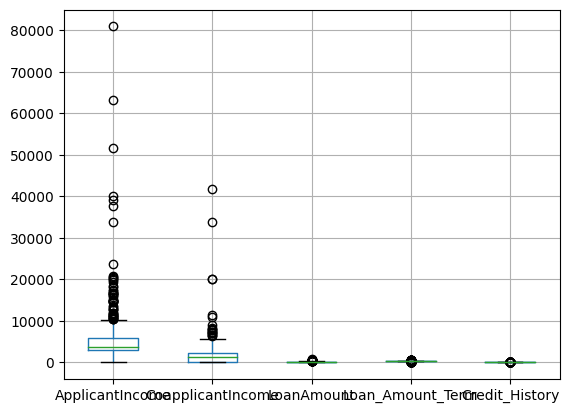

In [66]:
train.boxplot()

<Axes: >

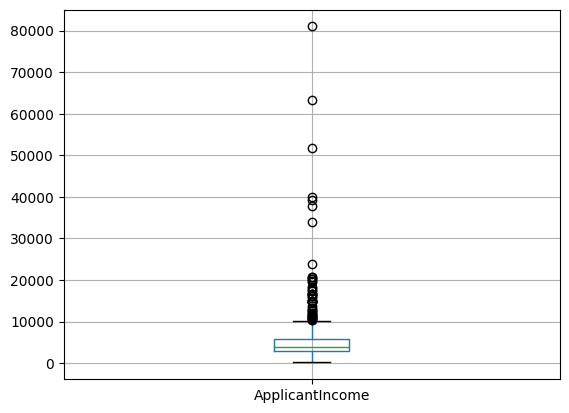

In [67]:
train.boxplot('ApplicantIncome')

<Axes: >

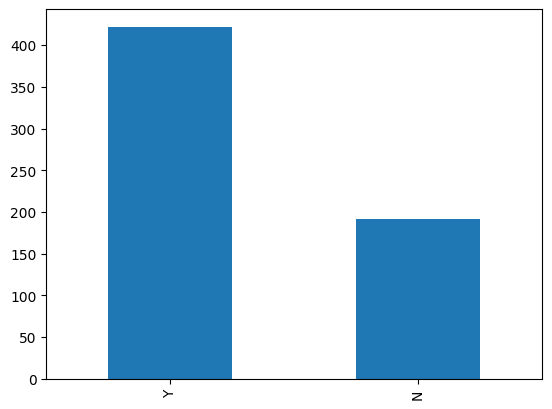

In [68]:
train['Loan_Status'].value_counts().plot(kind = 'bar')

<Axes: >

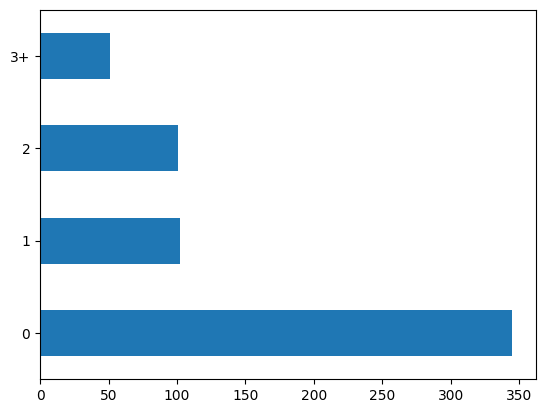

In [69]:
train['Dependents'].value_counts().plot(kind = 'barh')

<Axes: >

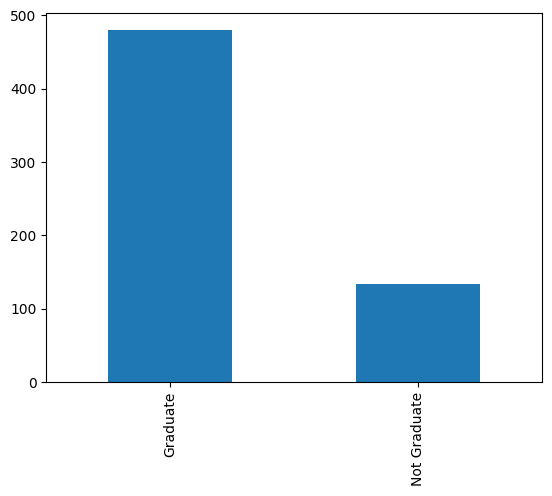

In [70]:
train['Education'].value_counts().plot(kind = 'bar')

In [71]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: >

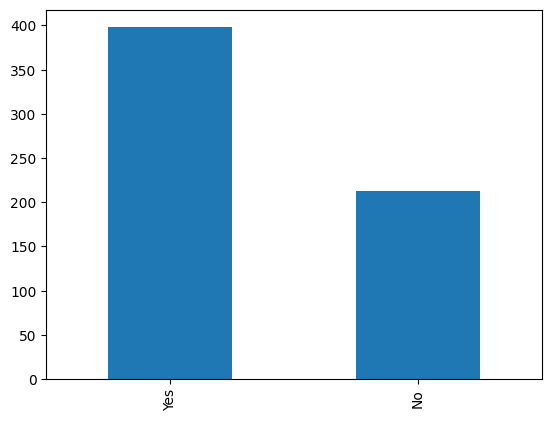

In [72]:
train['Married'].value_counts().plot(kind = 'bar')

<Axes: >

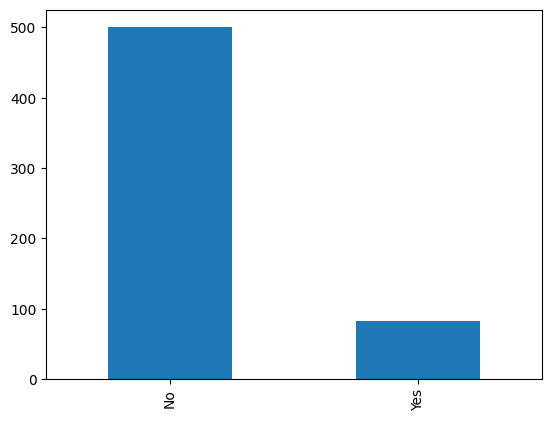

In [73]:
train['Self_Employed'].value_counts().plot(kind = 'bar')

<Axes: >

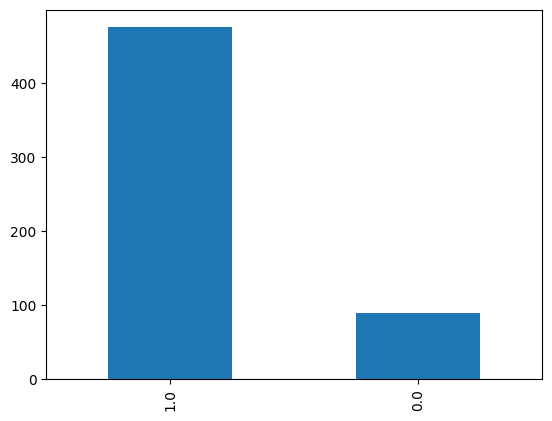

In [74]:
train['Credit_History'].value_counts().plot(kind = 'bar')

<Axes: >

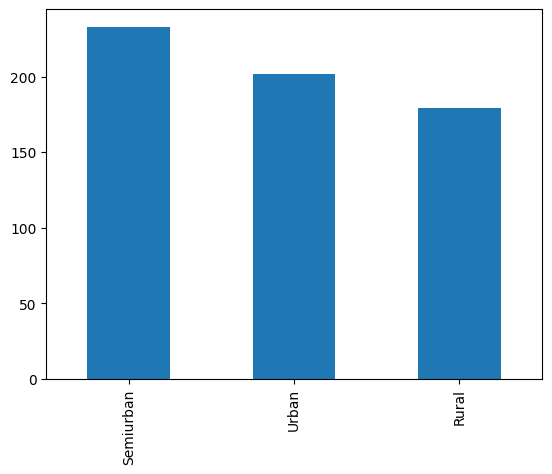

In [75]:
train['Property_Area'].value_counts().plot(kind = 'bar')

**Bi - Variate**

<ipython-input-76-52cc4d76803a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True)


<Axes: >

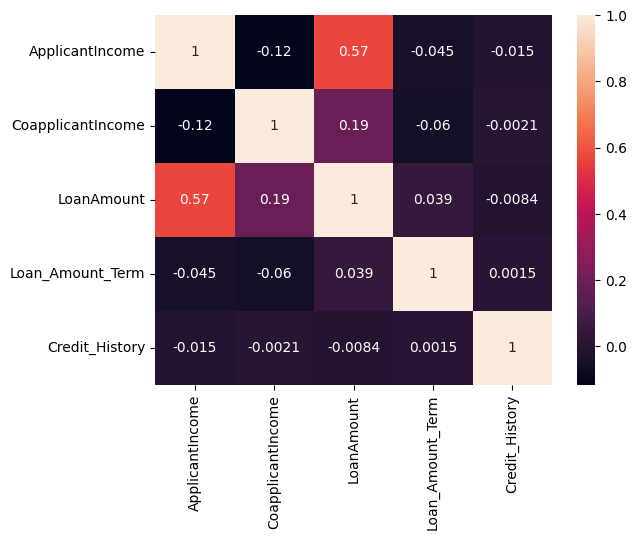

In [76]:
sns.heatmap(train.corr(), annot = True)

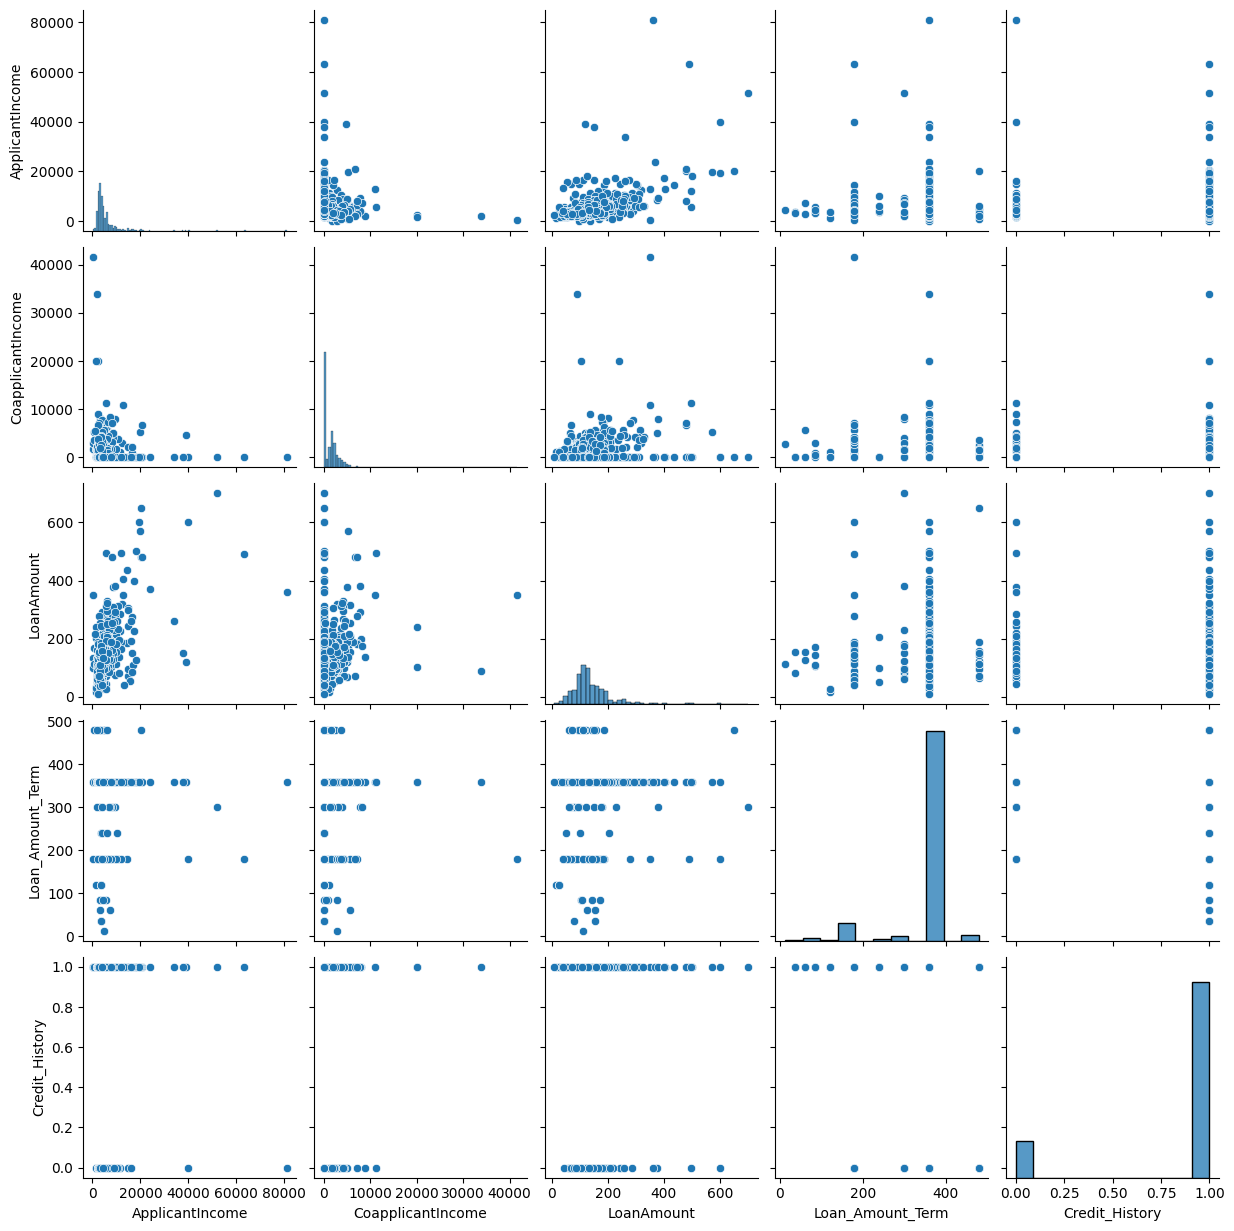

In [77]:
sns.pairplot(train)

In [78]:
from scipy.stats import chi2_contingency
def chi_sq_test(var1, var2):
    tab = pd.crosstab(var1, var2)
    _, p, _, _ = chi2_contingency(tab, correction = False)
    print(tab)
    if p < 0.05:
      print('Accept the alternate hypothesis', round(p,2))
    else:
      print('Failed to reject null hypothesis', round(p,2))



Relation between Loan_status and other Categorical variables
1.   Null Hypothesis : Gender and Loan_status are independent.
2.   Alternate Hypothesis : Gender and Loan_status are dependent.



In [79]:
chi_sq_test(train['Gender'], train['Loan_Status'])

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
Failed to reject null hypothesis 0.63


In [80]:
chi_sq_test(train['Education'], train['Loan_Status'])

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
Accept the alternate hypothesis 0.03


In [81]:
chi_sq_test(train['Credit_History'], train['Loan_Status'])

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378
Accept the alternate hypothesis 0.0


In [82]:
chi_sq_test(train['Dependents'], train['Loan_Status'])

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33
Failed to reject null hypothesis 0.37


In [83]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [84]:
chi_sq_test(train['Married'], train['Loan_Status'])

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
Accept the alternate hypothesis 0.03


In [85]:
chi_sq_test(train['Property_Area'], train['Loan_Status'])

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
Accept the alternate hypothesis 0.0


In [86]:
chi_sq_test(train['Self_Employed'], train['Loan_Status'])

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56
Failed to reject null hypothesis 0.96


# Data Preparation



1.  Impute missing values(mean, median)
2.  Handle inconsistency (3, 3+)
3.  dtype inconsistency (float, object, int)
4.  Encode the dataset





In [87]:
def data_prep(data):
  data['Gender'] = np.where(data['Gender'].isna(), "Male", data['Gender'])
  data['Married'] = np.where(data['Married'].isna(), 'Yes', data['Married'])
  data['Dependents'] = np.where(data['Dependents'].isna(), '0', data['Dependents'])
  data['Dependents'].replace('3+', '3', inplace = True)
  data['Dependents'] = data['Dependents'].astype('int')
  data['Self_Employed'] =np.where(data['Self_Employed'].isna(), 'No', data['Self_Employed'])
  data['Loan_Amount_Term'] =np.where(data['Loan_Amount_Term'].isna(), data['Loan_Amount_Term'].median(), data['Loan_Amount_Term'])
  data['LoanAmount'] =np.where(data['LoanAmount'].isna(), data['LoanAmount'].median(), data['LoanAmount'])
  data['Credit_History'] =np.where(data['Credit_History'].isna(), data['Credit_History'].median(), data['Credit_History'])
  data['Credit_History'] = data['Credit_History'].astype('int')
  return data

In [88]:
data_prep(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y


In [89]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


# Encoding the data

In [91]:
def enc(data):
  le = LabelEncoder()
  data['Gender'] = le.fit_transform(data['Gender'])
  data['Married'] = le.fit_transform(data['Married'])
  data['Education'] = le.fit_transform(data['Education'])
  data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
  data['Property_Area'] = le.fit_transform(data['Property_Area'])
  data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
  return data

In [92]:
### instead of above code can be used this one

def enc_new(data):
  le = LabelEncoder()
  for i in data.columns:
    if data[i] == 'O':
      data[i] = le.fit_transform(data[i])
      return data

In [93]:
enc(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 62.5+ KB


# Modeling Procedures

In [95]:
x = train.iloc[:, 1:12]
y = train['Loan_Status']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

In [97]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


Apply Logistic Regression

In [98]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_lr_train =  lr.predict(x_train)
pred_lr_test=lr.predict(x_test)

In [99]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  class_rep = classification_report(actual,predicted)
  print('model accuracy is:',round(acc_score,2))
  print(conf_matrix)
  print(class_rep)


In [100]:
model_eval(y_train, pred_lr_train)

model accuracy is: 0.82
[[ 65  85]
 [  5 336]]
              precision    recall  f1-score   support

           0       0.93      0.43      0.59       150
           1       0.80      0.99      0.88       341

    accuracy                           0.82       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.82      0.79       491



In [101]:
model_eval(y_test, pred_lr_test)

model accuracy is: 0.78
[[17 25]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123



Apply Decision Tree

In [102]:
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dtree.fit(x_train, y_train)
pred_dtree_train = dtree.predict(x_train)
pred_dtree_test = dtree.predict(x_test)

In [103]:
model_eval(y_train, pred_dtree_train)

model accuracy is: 0.84
[[ 77  73]
 [  8 333]]
              precision    recall  f1-score   support

           0       0.91      0.51      0.66       150
           1       0.82      0.98      0.89       341

    accuracy                           0.84       491
   macro avg       0.86      0.74      0.77       491
weighted avg       0.85      0.84      0.82       491



In [104]:
model_eval(y_test, pred_dtree_test)

model accuracy is: 0.76
[[17 25]
 [ 5 76]]
              precision    recall  f1-score   support

           0       0.77      0.40      0.53        42
           1       0.75      0.94      0.84        81

    accuracy                           0.76       123
   macro avg       0.76      0.67      0.68       123
weighted avg       0.76      0.76      0.73       123



In [105]:
dtree.feature_importances_

array([0.        , 0.        , 0.02810628, 0.        , 0.        ,
       0.05878405, 0.05972918, 0.10364015, 0.05181198, 0.64275287,
       0.05517549])

In [106]:
importances = list(zip(dtree.feature_importances_, x_train.columns))
importances.sort(reverse = True)
print(importances)

[(0.6427528672699072, 'Credit_History'), (0.10364014579547202, 'LoanAmount'), (0.059729183979811785, 'CoapplicantIncome'), (0.05878404991967647, 'ApplicantIncome'), (0.05517549018791446, 'Property_Area'), (0.051811982093064986, 'Loan_Amount_Term'), (0.028106280754153116, 'Dependents'), (0.0, 'Self_Employed'), (0.0, 'Married'), (0.0, 'Gender'), (0.0, 'Education')]


Apply Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf = RandomForestClassifier(n_estimators = 50, verbose = 2)
rf.fit(x_train,y_train)
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [109]:
model_eval(y_train, preds_rf_train)

model accuracy is: 1.0
[[149   1]
 [  0 341]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       1.00      1.00      1.00       341

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [110]:
model_eval(y_test, preds_rf_test)

model accuracy is: 0.76
[[19 23]
 [ 6 75]]
              precision    recall  f1-score   support

           0       0.76      0.45      0.57        42
           1       0.77      0.93      0.84        81

    accuracy                           0.76       123
   macro avg       0.76      0.69      0.70       123
weighted avg       0.76      0.76      0.75       123



In [57]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [112]:
import gradio as gr
import pickle

In [113]:
x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [114]:
with open("lr_model.pkl", "wb") as f:
  pickle.dump(lr, f)

In [115]:
Gender =  gr.Number(label = "Enter 1 for Male and 0 for Female")
Married =  gr.Number(label = "Enter 1 for Married and 0 for Not Married")
Dependents =  gr.Number(label = "Enter Dependents")
Education =  gr.Number(label = "Enter 1 for Graduate and 0 for Not Graduate")
Self_Employed =  gr.Number(label = "Enter 1 for Self_Employed and 0 for Not Self_Employed")
ApplicantIncome = gr.Number(label= "Enter Applicant Income Income")
CoapplicantIncome = gr.Number(label = "Enter Coapplicant Income")
LoanAmount = gr.Number(label= "Enter the loan amount")
Loan_Amount_Term = gr.Number(label= "Enter the loan amount between 12-360")
Credit_History = gr.Number(label = "Enter the Credit_History")
Property_Area =  gr.Number(label = "Enter 1 for Urban, 0 for Rural ans 2 for semi-Urban")

# We create the output
output = gr.Textbox()

In [116]:
def make_prediction(Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area):
    with open("lr_model.pkl", "rb") as f:
        clf  = pickle.load(f)
        preds = clf.predict([[Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]])
    if preds == 1:
            return "You are eligible for the loan"
    return "You are not eligible for the loan"


In [ ]:
app = gr.Interface(fn = make_prediction, inputs=[Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area], outputs=output)
app.launch(debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>